In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers import *
from data_processing import *
from cross_validation import *

## How to use it

In [2]:
features, labels = load_data()

In [3]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels)
weights, loss = least_squares(train_y, train_tx)
train_score, test_score = correctness(train_tx, train_y, test_tx, test_y, weights)

There are 74.42228571428572% correct prediction in the training set
There are 74.404% correct prediction in the test set


In [4]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels, dtype = 'row')
weights, loss = least_squares(train_y, train_tx)
train_score, test_score = correctness(train_tx, train_y, test_tx, test_y, weights)

There are 72.69238029321085% correct prediction in the training set
There are 72.40029361389773% correct prediction in the test set


## Cross validation

In [5]:
features, labels = load_data()

In [6]:
train_tx, train_y, test_tx, test_y = preprocessing(features, labels)

[0.08512391 0.0851629 ]
[0.08512393 0.0851629 ]
[0.08512396 0.08516291]
[0.08512403 0.08516294]
[0.08512417 0.08516302]
[0.08512441 0.0851632 ]
[0.08512488 0.08516358]
[0.08512575 0.08516433]
[0.08512737 0.08516579]
[0.08513039 0.08516859]
[0.08513597 0.0851739 ]
[0.08514623 0.0851838 ]
[0.08516494 0.08520206]
[0.08519869 0.08523527]
[0.08525884 0.08529476]
[0.08536442 0.08539959]
[0.08554671 0.08558104]
[0.08585584 0.08588931]
[0.08637093 0.08640355]
[0.08721535 0.08724719]
[0.08857932 0.08861048]
[0.09074984 0.09078043]
[0.09414114 0.09417119]
[0.09930607 0.09933554]
[0.10689587 0.10692459]
[0.11753582 0.11756357]
[0.13161761 0.13164417]
[0.14907449 0.14909963]
[0.16925967 0.16928314]
[0.19102552 0.19104704]


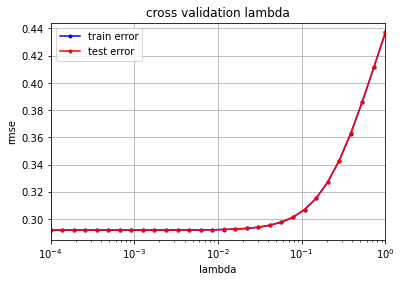

In [16]:
def cross_validation_lambda_demo():
    seed = 1
    k_fold = 10
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(train_y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # compute loss for each lambda is lambdas
    for i in range(len(lambdas)):
        losses = np.zeros([k_fold, 2])
        for k in range(k_fold):
            losses[k, :] = cross_validation(train_y, train_tx, k_indices, k, lambdas[i])

        mean_losses = np.mean(losses, axis=0)
        print(mean_losses)
        rmse_tr.append(np.sqrt(mean_losses[0]))
        rmse_te.append(np.sqrt(mean_losses[1]))
    
    cross_validation_lambda_visualization(lambdas, rmse_tr, rmse_te)
        
cross_validation_lambda_demo()